<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BPart4%2C_Chap10%5D_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC_%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA, 탐색적 데이터 분석

In [16]:
import numpy as np

# random 한 특성 ! seed -> 랜덤성 조절
seed = 1234
np.random.seed(seed)

In [4]:
# 한글 이슈 해결 - Colab
#폰트설치나눔폰트패키지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,219 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

## 데이터 로드

In [17]:
import pandas as pd


# 데이터 경로 지정 및 읽어오기
data_path = '/content/insurance.csv'
insurance_data = pd.read_csv(data_path)

# 데이터 꼴 확인
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 기본 분석 및 기초 통계 분석

In [18]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
insurance_data.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = insurance_data.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
#################### 기초 통계량 ####################
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.20702

## 수치형 데이터 분석

### 분포 확인

In [13]:
## 수치형 데이터 시각화

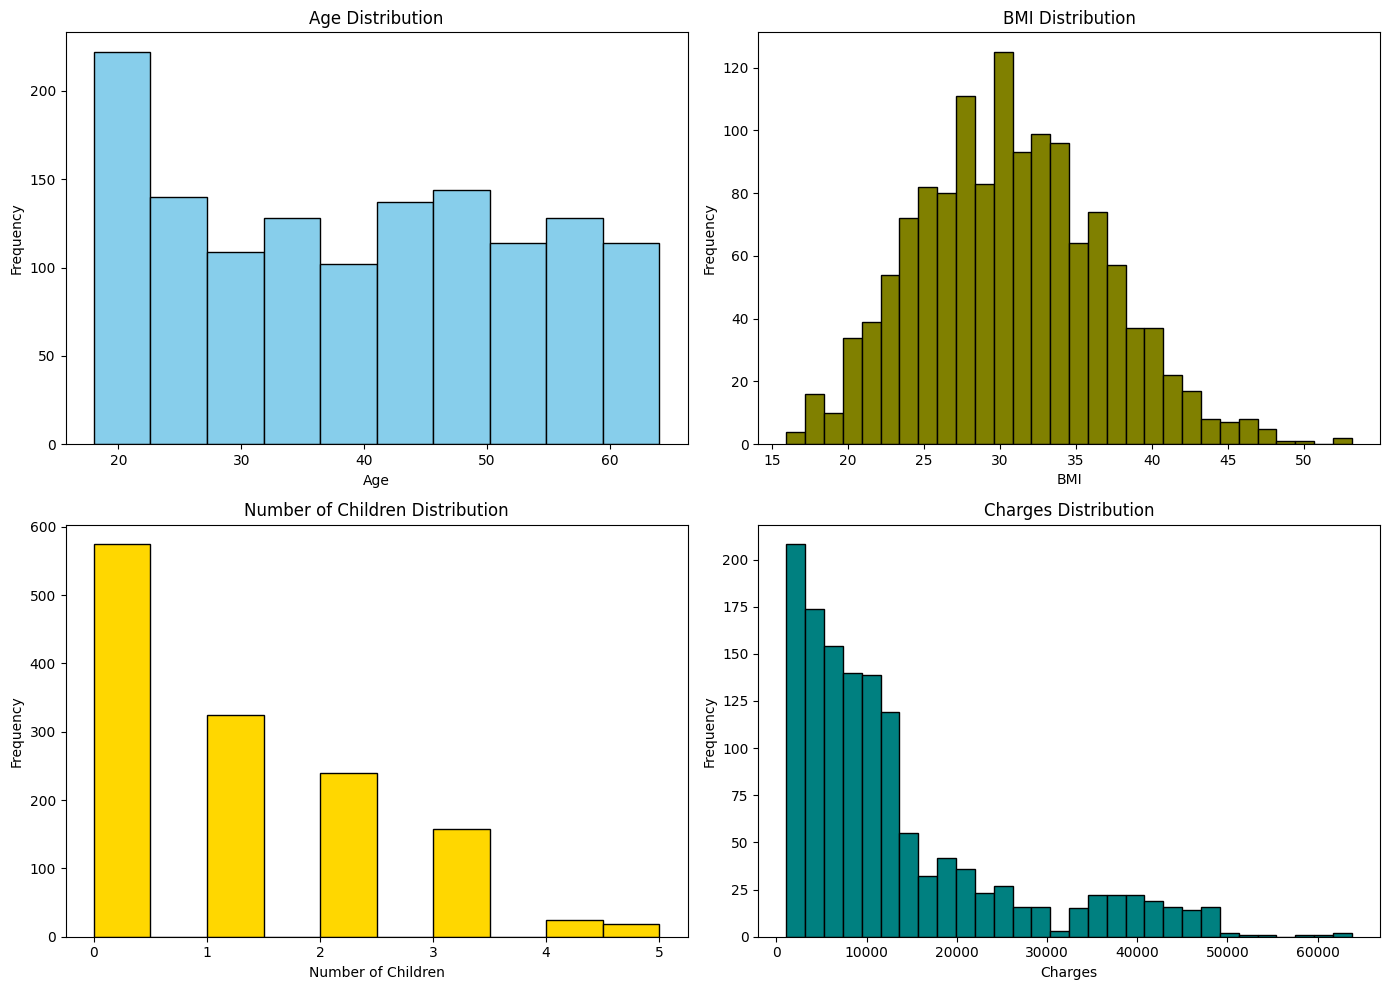

In [21]:
import matplotlib.pyplot as plt

# 스케치북 생성 가로, 세로
plt.figure(figsize=(14, 10))

# 나이 분포 subplot 내부에 그림 1번
plt.subplot(2, 2, 1)
plt.hist(insurance_data['age'], color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI 분포 subplot 2번
plt.subplot(2, 2, 2)
plt.hist(insurance_data['bmi'], bins=30, color='olive', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# 부양가족 분포
plt.subplot(2, 2, 3)
plt.hist(insurance_data['children'], color='gold', edgecolor='black')
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# 의료비 분포
plt.subplot(2, 2, 4)
plt.hist(insurance_data['charges'], bins=30, color='teal', edgecolor='black')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
# 로그분석! 평탄하게 만들어줌

plt.tight_layout()
plt.show()

### 상관관계 분석


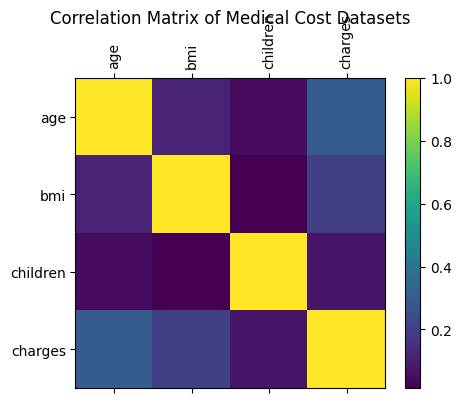

#################### 상관관계 값 확인 ####################
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [26]:
# 특성들끼리 관계도 숫자형만!
numerical_data = insurance_data.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(5, 4))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Medical Cost Datasets', y=1.15)
plt.show()

# 상관관계 값 프린트
print('#'*20, '상관관계 값 확인', '#'*20)
print(correlation_matrix)

## 카테고리 데이터 분석

성별, 흡연여부, 지역별

### 분포 확인

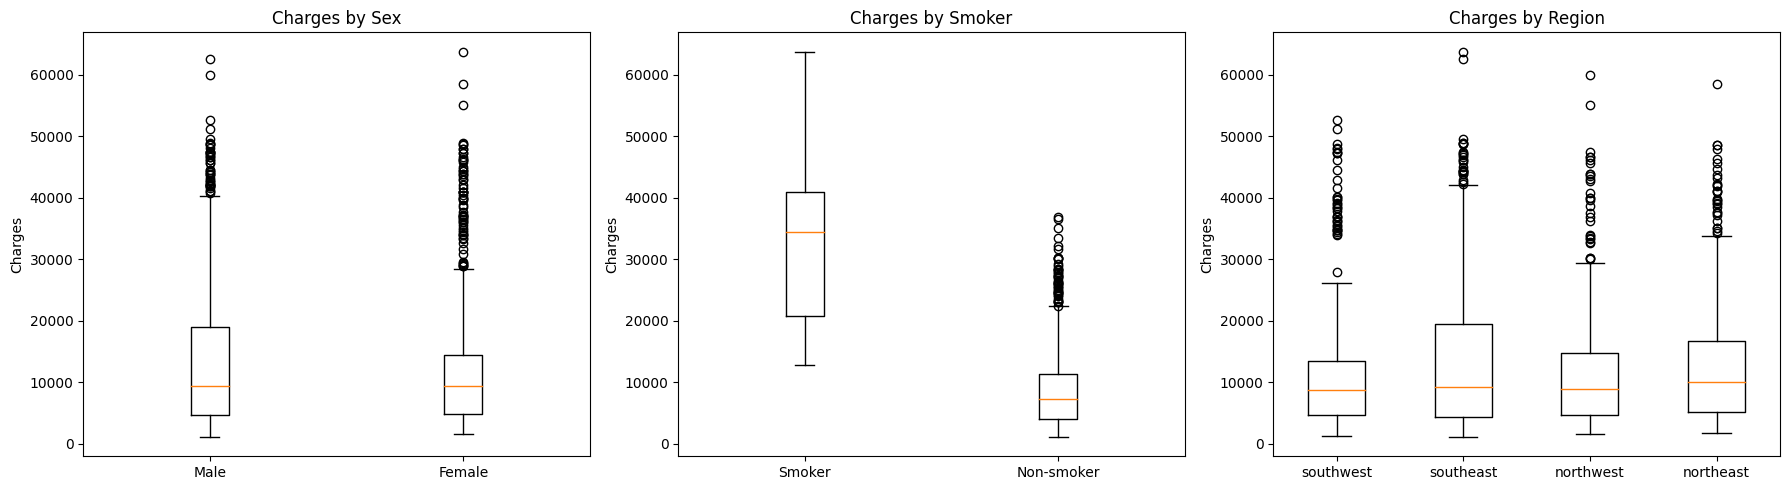

In [27]:
plt.figure(figsize=(18, 5))

# 성별에 따른 의료비용
plt.subplot(1, 3, 1)
plt.boxplot([insurance_data[insurance_data['sex']=='male']['charges'],
             insurance_data[insurance_data['sex']=='female']['charges']],
            labels=['Male', 'Female'])
plt.title('Charges by Sex')
plt.ylabel('Charges')

# 흡연 유무에 따른 의료비용
plt.subplot(1, 3, 2)
plt.boxplot([insurance_data[insurance_data['smoker']=='yes']['charges'],
             insurance_data[insurance_data['smoker']=='no']['charges']],
            labels=['Smoker', 'Non-smoker'])
plt.title('Charges by Smoker')
plt.ylabel('Charges')

# 거주 지역에 따른 의료비용
plt.subplot(1, 3, 3)
regions = insurance_data['region'].unique()
region_charges = [insurance_data[insurance_data['region']==region]['charges'] for region in regions]
plt.boxplot(region_charges, labels=regions)
plt.title('Charges by Region')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

- 성별\
남자의 경우가 훨씬더 넓게 분포 \
남성의 경우 여성보다 의료비용을 좀 더 많이냄
- 흡연\
흡연은 두드러지는 차이 -> 종속변수에 영향을 미치는 큰요인으로 보임
- 지역별 \
차이는 보이지만 흡연 유무만큼은 아님


# 데이터 전처리

## 카테고리형 변수 인코딩


- 카테고리형 변수는 선형모델에 입력으로 사용하기위해 수치형으로 변경 (성별, 흡연유무, 지역)
- 일반적으로 원-핫 인코딩 방식사용\
성별_남성, 성별_여성 이라는 별도의 열을 만들고 각각을 0과1로 변환
- pandas 의 get_dummies 함수사용\
drop_first 옵션은 첫 카테고리를 제거하는 역할 (남성만 남음)\
새롭게 생겨난 변수들의 강한 상관관계가 나타나서 (다중공선성) 보통은 제거하는것이 좋음!



지역의 경우 4가지컬럼이 생성되고 첫번째컬럼이 삭제됨 -> 3개만 남음

In [29]:

insurance_encoded = pd.get_dummies(insurance_data, drop_first=True)
insurance_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [30]:
# drop_first를 False로 주면 특정 변수 간 강한 상관관계가 나타나 다중공선성 문제 가능성이 있음
pd.get_dummies(insurance_data, drop_first=False)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


## 학습 및 평가 데이터 분리


- 원래는 학습.검증. 평가 과정으로 나누어야하지만 실제 서비스 모델을 개발하는과정이 아니므로 학습과 평가 데이터로만 분리

먼저 독립 변수와 종속변수를 분리 \
pandas dataframe 에서 특정 열만 뽑아서 정의
- 학습과 평가 데이터로 분리\
sklearn 의 내장함수인 train_test_split이라는 함수 사용 \
test_size 변수는 학습과 평가 데이터 사이의 비율을 의미


In [31]:
from sklearn.model_selection import train_test_split
y_column = ['charges']
X = insurance_encoded.drop(y_column, axis=1)
y = insurance_encoded[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [32]:
print('#'*20, 'X_train', '#'*20)
print(X_train.head, end='\n')
print('#'*20, 'Y_train', '#'*20)
print(y_train.head, end='\n\n')
print('#'*20, 'X_test', '#'*20)
print(X_test.head, end='\n')
print('#'*20, 'Y_test', '#'*20)
print(y_test.head, end='\n')

#################### X_train ####################
<bound method NDFrame.head of       age     bmi  children  sex_male  smoker_yes  region_northwest  \
560    46  19.950         2     False       False              True   
1285   47  24.320         0     False       False             False   
1142   52  24.860         0     False       False             False   
969    39  34.320         5     False       False             False   
486    54  21.470         3     False       False              True   
...   ...     ...       ...       ...         ...               ...   
1095   18  31.350         4     False       False             False   
1130   39  23.870         5     False       False             False   
1294   58  25.175         0      True       False             False   
860    37  47.600         2     False        True             False   
1126   55  29.900         0      True       False             False   

      region_southeast  region_southwest  
560              False  

## 특성 스케일링


- 서로다른 수치형 데이터 특성 사이의 값 범위를 비슷하게 맞춰주는 과정\
효과
- 특히 경사 하강법을 사용하는 과정에서 수렴속도를 높일 수있음
- 규제모델을 사용한다면 일부 특성에 강하게 규제가 걸리는 과정을 회피\
방법
- StandardScaler\
평균 0, 표준편차1로 조정\
데이터분포가 정규분포일경우 사용하면 best
- MinMaxScaler\
최댓값1, 최솟값0 이되도록 조정\
이상치가 큰 영향을 미치는 경우 사용



In [37]:
# standard scaler사용

from sklearn.preprocessing import StandardScaler

encoded_columns = list(set(insurance_encoded.columns) - set(insurance_data.columns)) # ['region_southwest', 'region_southeast', 'region_northwest', 'smoker_yes', 'sex_male']
continuous_columns = list(set(insurance_encoded.columns) - set(encoded_columns) - set(y_column)) # ['bmi', 'age', 'children']
# 출력으로 나오는 컬럼은 스케일링 안함! 비용x

scaler = StandardScaler()

# 수치형 데이터만 스케일링 진행
X_train_continuous = scaler.fit_transform(X_train[continuous_columns])
X_test_continuous = scaler.fit_transform(X_test[continuous_columns])

# 스케일 된 데이터와 스케일에 사용되지 않은 데이터 조합
X_train_continuous_df = pd.DataFrame(X_train_continuous, columns=continuous_columns)
X_test_continuous_df = pd.DataFrame(X_test_continuous, columns=continuous_columns)

X_train_categorical_df = X_train[encoded_columns].reset_index(drop=True)
X_test_categorical_df = X_test[encoded_columns].reset_index(drop=True)

X_train_final = pd.concat([X_train_continuous_df, X_train_categorical_df], axis=1)
X_test_final = pd.concat([X_test_continuous_df, X_test_categorical_df], axis=1)

In [36]:
# 결과 확인
X_train_final

,age,bmi,children,region_northwest,sex_male,smoker_yes,region_southwest,region_southeast
0,0.472227,-1.756525,0.734336,True,False,False,False,False
1,0.543313,-1.033082,-0.911192,False,False,False,False,False
2,0.898745,-0.943687,-0.911192,False,False,False,False,True
3,-0.025379,0.622393,3.202629,False,False,False,False,True
4,1.040918,-1.504893,1.557100,True,False,False,False,False
...,...,...,...,...,...,...,...,...
1065,-1.518194,0.130717,2.379865,False,False,False,False,False
1066,-0.025379,-1.107579,3.202629,False,False,False,False,True
1067,1.325264,-0.891539,-0.911192,False,True,False,False,False
1068,-0.167551,2.820864,0.734336,False,False,True,True,False


In [38]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


# 모델 구축 및 결과 확인

## 학습 진행

In [39]:
# w0에 해당하는 편향(bias) 부분을 추가
  # 내장함수를 이용하면 자동으로 추가
# 이론 과정에서는 식의 형태로 인해 맨 앞쪽에 넣었지만
# 위치는 크게 상관이 없음 (여기서는 맨 뒤로 들어감)

X_train_final['bias'] = 1
X_test_final['bias'] = 1

X_train_final

# 만약 맨 앞에 넣겠다면 아래와 같이 적을 수 있음
# X_train_final.insert(0, 'bias', 1)
# X_train_final

,age,bmi,children,region_northwest,sex_male,smoker_yes,region_southwest,region_southeast,bias
0,0.472227,-1.756525,0.734336,True,False,False,False,False,1
1,0.543313,-1.033082,-0.911192,False,False,False,False,False,1
2,0.898745,-0.943687,-0.911192,False,False,False,False,True,1
3,-0.025379,0.622393,3.202629,False,False,False,False,True,1
4,1.040918,-1.504893,1.557100,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...
1065,-1.518194,0.130717,2.379865,False,False,False,False,False,1
1066,-0.025379,-1.107579,3.202629,False,False,False,False,True,1
1067,1.325264,-0.891539,-0.911192,False,True,False,False,False,1
1068,-0.167551,2.820864,0.734336,False,False,True,True,False,1


In [40]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 초기화 및 학습
linear_reg = LinearRegression()
linear_reg.fit(X_train_final, y_train)


# 학습된 모델의 계수(coefficients) 및 절편(intercept) 출력
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

print('#'*20, '학습된 파라미터 값', '#'*20)
print(coefficients)

print('#'*20, '학습된 절편 값', '#'*20)
print(intercept)

#################### 학습된 파라미터 값 ####################
[[ 3.61497541e+03  2.03622812e+03  5.16890247e+02 -3.70677326e+02
  -1.85916916e+01  2.36511289e+04 -8.09799354e+02 -6.57864297e+02
   0.00000000e+00]]
#################### 학습된 절편 값 ####################
[8955.2448015]


## 학습 모델 평가 진행

In [41]:
from sklearn.metrics import mean_squared_error

# 예측 수행
y_train_pred = linear_reg.predict(X_train_final)
y_test_pred = linear_reg.predict(X_test_final)

# 평가 지표 계산: MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('학습 데이터를 이용한 MSE 값 :', mse_train)
print('평가 데이터를 이용한 MSE 값 :', mse_test)
# 값만 보고 MSE 를 평가하기ㅣ는 쉽지않음

학습 데이터를 이용한 MSE 값 : 37277681.70201866
평가 데이터를 이용한 MSE 값 : 33585879.16826561


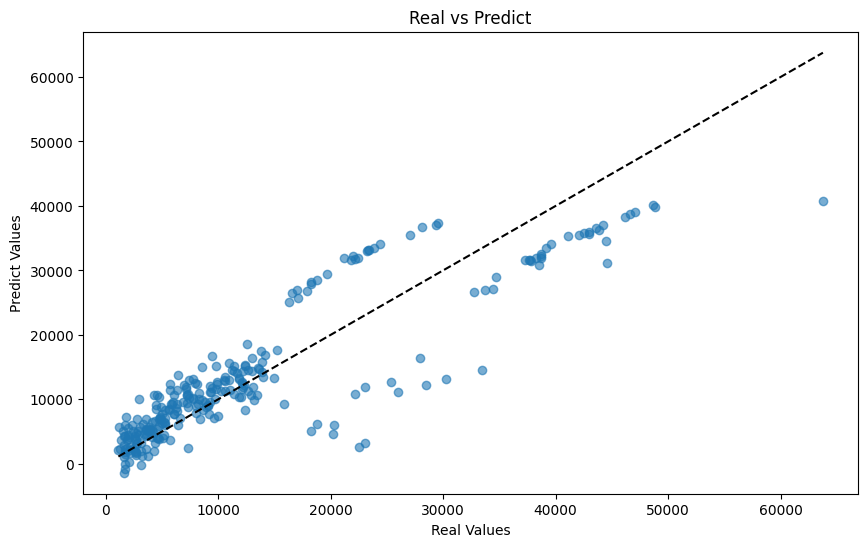

In [42]:
# 테스트 데이터셋에 대한 실제 값과 예측 값을 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # 완벽한 예측을 나타내는 대각선
plt.xlabel('Real Values')
plt.ylabel('Predict Values')
plt.title('Real vs Predict')
plt.show()

실제값이 낮은경우는 예측을 잘함.. 커지면 못함


## 결과 해석

### 선형 회귀 모델에 영향을 미치는 변수의 중요도

변수 레벨로 해석해보기

In [43]:
coeff_df = pd.DataFrame({'feature': X_train_final.columns, 'coefficient': linear_reg.coef_.flatten()})

# 계수의 절대값을 기준으로 내림차순 정렬
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coefficient', ascending=False)

# 변수의 영향력을 확인
coeff_df_sorted

,feature,coefficient,abs_coefficient
5,smoker_yes,23651.128856,23651.128856
0,age,3614.975415,3614.975415
1,bmi,2036.228123,2036.228123
6,region_southwest,-809.799354,809.799354
7,region_southeast,-657.864297,657.864297
2,children,516.890247,516.890247
3,region_northwest,-370.677326,370.677326
4,sex_male,-18.591692,18.591692
8,bias,0.000000,0.000000


흡연 -예스 값이 23651....정도 영향을 미침

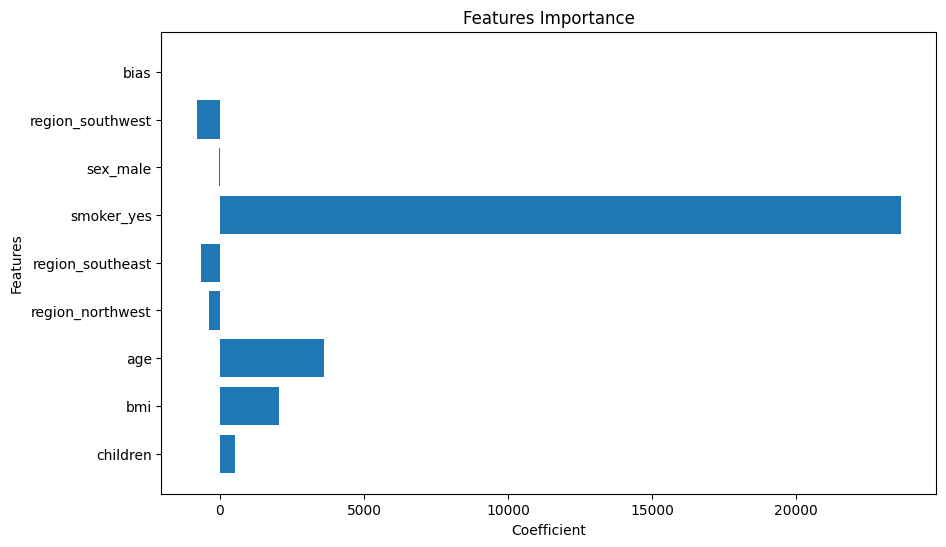

In [ ]:
# 변수 영향력 시각화
plt.figure(figsize=(10, 6))
plt.barh(X_train_final.columns, linear_reg.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Features Importance')
plt.show()

담배를 많이 필수록 의료비에 영향을 미침! 남성은 많이 영향을 미치지않음

### 잔차 분석

실제 정답과 예측값 차이분석

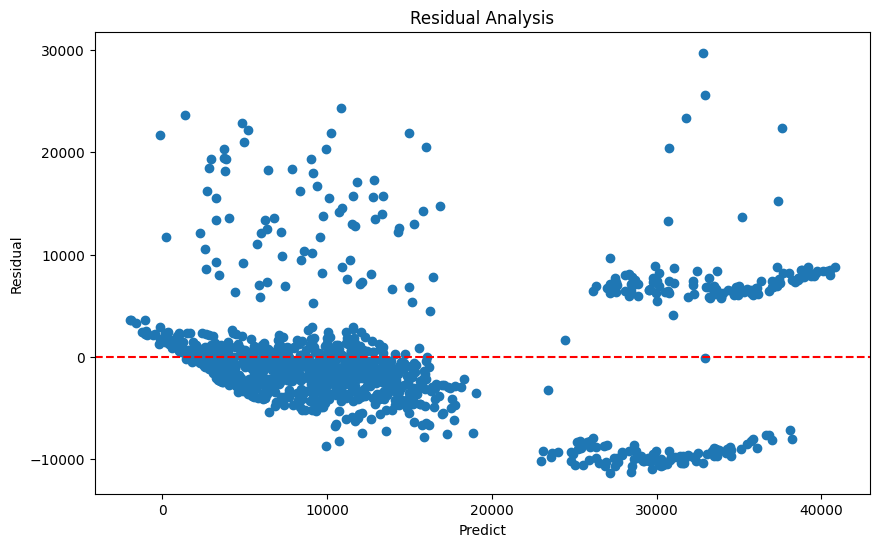

In [44]:
# 정답과의 차이를 보이는 잔치(residual)을 시각화해
# 이것의 분포를 확인해 데이터의 패턴을 알마나 잘 포착하는지를 판단
# 무작위로 분포되어야 좋은 상황

# 잔차 도출
y_pred = linear_reg.predict(X_train_final)
residuals = y_train - y_pred

# 잔차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predict')
plt.ylabel('Residual')
plt.title('Residual Analysis')
plt.show()

예측값이 작을 경우에서도 큰 정답과의 차이가 있는것도 있음. 예측값이 큰 부분의 양수적 방향, 음수적방향의 누락\
면밀히 살펴보고 파악해 전처리과정으로 다시 돌아가기